In [3]:
#Hyperparameter tuning
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv")

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

parameter_space = {
    "max_depth": [1,2,3,4,5],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_features": np.linspace(1,9,1)
}

DT=DecisionTreeClassifier()
DT_RCV=RandomizedSearchCV(DT, parameter_space)
DT_RCV.fit(X_train,y_train)

print("Best parameters through Randomized search: ", DT_RCV.best_params_)
print("Best score for Randomized search: ", DT_RCV.best_score_)

DT_GCV=GridSearchCV(DT, parameter_space)
DT_GCV.fit(X_train,y_train)

print("Best parameter through Grid search: ", DT_GCV.best_params_)
print("Best score for Grid search: ", DT_GCV.best_score_)

Best parameters through Randomized search:  {'splitter': 'best', 'max_features': np.float64(1.0), 'max_depth': 5, 'criterion': 'log_loss'}
Best score for Randomized search:  0.9735177865612649
Best parameter through Grid search:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': np.float64(1.0), 'splitter': 'best'}
Best score for Grid search:  0.9735177865612649


In [5]:
from pickle import dump

with open("D:\\AppStoneLab\\Day-wise\\Day 4\\DT_RCV.pkl","wb") as f:
    dump(DT_RCV, f)

In [8]:
from pickle import load

with open("D:\\AppStoneLab\\Day-wise\\Day 4\\DT_RCV.pkl", "rb") as f:
    model=load(f)
print(model)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': array([1.]),
                                        'splitter': ['best', 'random']})


In [21]:
#stacking

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 3\\KNNAlgorithmDataset.csv")
df.drop(columns=['Unnamed: 32', 'id'],axis=1, inplace=True)

X=df.drop(columns='diagnosis', axis=1)
y=df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

rf=RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
f1_rf=f1_score(y_test, y_pred_rf)
print("F1 score of RF: ",f1_rf)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
f1_gnb=f1_score(y_test, y_pred_gnb)
print("F1 score of GNB: ",f1_gnb)

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
f1_knn=f1_score(y_test, y_pred_knn)
print("F1 score of KNN: ",f1_knn)

base_estimators=[('rf',rf), ('gnb',gnb), ('knn',knn)]

stacked_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), stack_method='predict_proba')
stacked_model.fit(X_train, y_train)
y_pred_stacked=stacked_model.predict(X_test)
f1_stacked=f1_score(y_test, y_pred_stacked)
print("F1 score of Stacked Model: ", f1_stacked)

F1 score of RF:  0.9454545454545454
F1 score of GNB:  0.9272727272727272
F1 score of KNN:  0.9454545454545454
F1 score of Stacked Model:  0.9541284403669725


In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 3\\KNNAlgorithmDataset.csv")
df.drop(columns=['Unnamed: 32', 'id'],axis=1, inplace=True)

X=df.drop(columns='diagnosis', axis=1)
y=df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

rf=RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
f1_rf=f1_score(y_test, y_pred_rf)
print("F1 score of RF: ",f1_rf)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
f1_gnb=f1_score(y_test, y_pred_gnb)
print("F1 score of GNB: ",f1_gnb)

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
f1_knn=f1_score(y_test, y_pred_knn)
print("F1 score of KNN: ",f1_knn)

base_estimators=[('rf',rf), ('gnb',gnb), ('knn',knn)]

VC_soft=VotingClassifier(estimators=base_estimators, voting='soft')
VC_soft.fit(X_train, y_train)
y_pred_VCS=VC_soft.predict(X_test)
f1_VCS=f1_score(y_test, y_pred_VCS)
print("F1 score of VCS: ",f1_VCS)

VC_hard=VotingClassifier(estimators=base_estimators, voting='hard')
VC_hard.fit(X_train, y_train)
y_pred_VCH=VC_hard.predict(X_test)
f1_VCH=f1_score(y_test, y_pred_VCH)
print("F1 score of VCS: ",f1_VCH)

F1 score of RF:  0.9454545454545454
F1 score of GNB:  0.9272727272727272
F1 score of KNN:  0.9454545454545454
F1 score of VCS:  0.9541284403669725
F1 score of VCS:  0.9541284403669725


In [7]:
#KNN Imputer
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

dict={
    'maths':[91, 87, np.nan, 85, 63],
    'physics':[np.nan, 84, 79, 88, 95],
    'chemistry':[87, np.nan, 83, 91, 81],
    'biology':[98, 91, 88, 89, np.nan]
    }
df=pd.DataFrame(dict)
print(df)

imputer1=KNNImputer(n_neighbors=2)
df_imputed1=pd.DataFrame(imputer1.fit_transform(df))
print(df_imputed1)

imputer2=IterativeImputer(max_iter=10)
df_imputed2=pd.DataFrame(imputer2.fit_transform(df))
print(df_imputed2)

   maths  physics  chemistry  biology
0   91.0      NaN       87.0     98.0
1   87.0     84.0        NaN     91.0
2    NaN     79.0       83.0     88.0
3   85.0     88.0       91.0     89.0
4   63.0     95.0       81.0      NaN
      0     1     2     3
0  91.0  86.0  87.0  98.0
1  87.0  84.0  87.0  91.0
2  86.0  79.0  83.0  88.0
3  85.0  88.0  91.0  89.0
4  63.0  95.0  81.0  88.5
           0          1          2          3
0  91.000000  86.499989  87.000000  98.000000
1  87.000000  84.000000  85.534989  91.000000
2  89.777706  79.000000  83.000000  88.000000
3  85.000000  88.000000  91.000000  89.000000
4  63.000000  95.000000  81.000000  92.101722


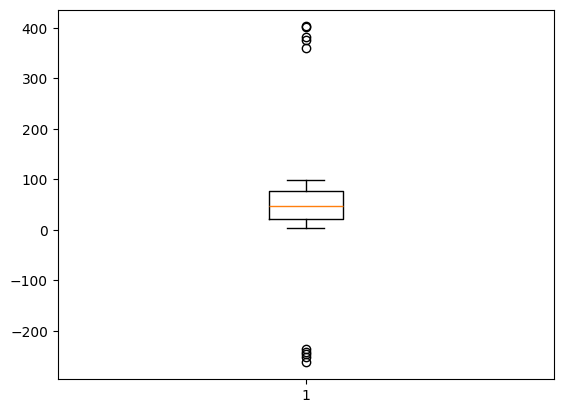

{'whiskers': [<matplotlib.lines.Line2D at 0x2c60cdf5010>,
 'caps': [<matplotlib.lines.Line2D at 0x2c60cdf52b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c60cdf4ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c60cdf5550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c60cdf56a0>],
 'means': []}

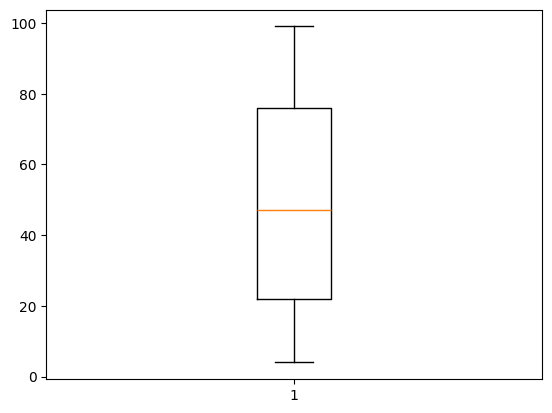

In [47]:
#winsorization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import random

array=[np.random.randint(1, 100) for i in range(90)]
mean_og=np.mean(x)
std_og=np.std(x)

AlreadySelected = []
i = 0
while (i < 5):
    x = np.random.choice(array)  
    y = x - mean_og*4
    array = np.append(array, y)
    if (x not in AlreadySelected):
        AlreadySelected.append(y)

        i += 1

    else:
        continue
i = 0
while (i < 5):
    x = np.random.choice(array)  
    y = x + mean_og*4
    array = np.append(array, y)
    if (x not in AlreadySelected):
        AlreadySelected.append(y)

        i += 1

    else:
        continue
WinsorizedArray = winsorize(array,(0.05,0.05))

plt.boxplot(array)
plt.show()

plt.boxplot(WinsorizedArray)


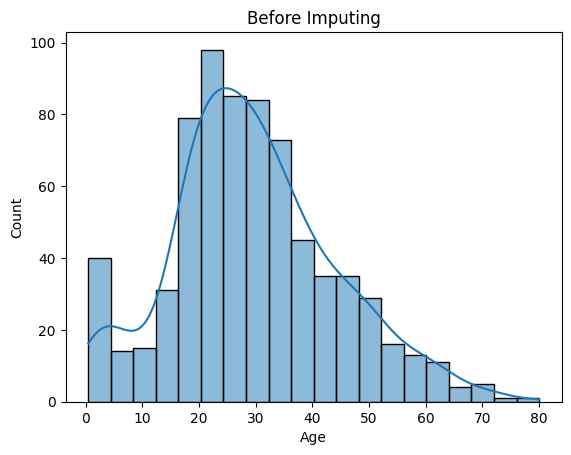

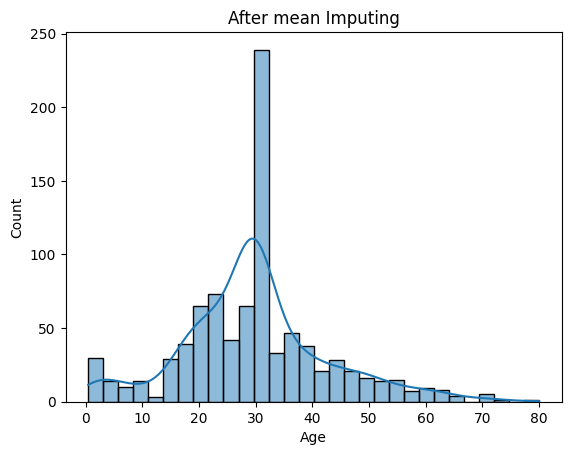

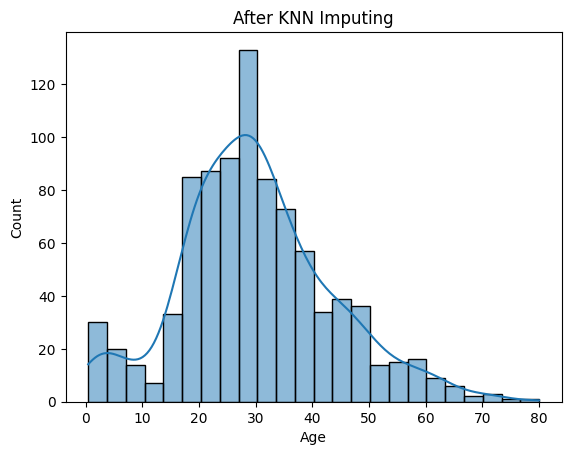

In [87]:
#mini project 
from sklearn.impute import KNNImputer

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 1\\Titanic-Dataset.csv")
df.drop(columns=['PassengerId', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)

sns.histplot(df['Age'], kde=True)
plt.title('Before Imputing')
plt.show()

df_mean=df.fillna(df.mean())

sns.histplot(df_mean['Age'], kde=True)
plt.title('After mean Imputing')
plt.show()

imputer=KNNImputer()
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

sns.histplot(df_imputed['Age'], kde=True)
plt.title('After KNN Imputing')
plt.show()


In [ ]:
#target encoding

df=pd.read_csv("autos.csv")

df['make_target_encoded']=df.groupby('make')['price'].transform('mean') #price is target variable so encoded values will reflect average procce of that car maker
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_target_encoded
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,15498.333333
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,15498.333333
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,15498.333333
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950,17859.166667
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450,17859.166667


In [105]:
#frequency encoding

df=pd.read_csv("autos.csv")
frequency=df['make'].value_counts()
print(frequency)
df['make_frequency_encoded']=pd.Series([frequency[x] for x in df['make']])
df.head()

make
toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
volvo            11
peugot           11
bmw               8
mercedes-benz     8
dodge             8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: count, dtype: int64


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_frequency_encoded
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,3
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,3
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,3
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950,6
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450,6


In [112]:
#polynomial encoding

from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv("autos.csv")
df=df[['wheel_base','length']]
print(df.head())

poly=PolynomialFeatures(degree=2)
df_poly=pd.DataFrame(poly.fit_transform(df))
print(df_poly.head())

   wheel_base  length
0        88.6   168.8
1        88.6   168.8
2        94.5   171.2
3        99.8   176.6
4        99.4   176.6
     0     1      2        3         4         5
0  1.0  88.6  168.8  7849.96  14955.68  28493.44
1  1.0  88.6  168.8  7849.96  14955.68  28493.44
2  1.0  94.5  171.2  8930.25  16178.40  29309.44
3  1.0  99.8  176.6  9960.04  17624.68  31187.56
4  1.0  99.4  176.6  9880.36  17554.04  31187.56


In [114]:
#interaction feature generation

df=pd.read_csv("autos.csv")
df['interaction_generated']=df['length']*df['width']*df['height']
df.head()


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,interaction_generated
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,528019.904
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,528019.904
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,587592.640
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950,634816.956
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450,636734.832


In [126]:
#Binning and Discretization

import pandas as pd
import numpy as np

data = pd.Series([18, 22, 25, 30, 35, 42, 50, 55, 60, 65, 70])

bins = 4
labels = ['Low', 'Moderate', 'High', 'Very High']

data_binned_width = pd.cut(data, bins=bins, labels=labels)
print("Equal-Width Bins:\n", pd.DataFrame({'data':data, 'binned':data_binned_width}))

data_binned_freq = pd.qcut(data, q=4, labels=labels)
print("\nEqual-Frequency Bins:\n", pd.DataFrame({'data':data, 'binned':data_binned_freq}))


custom_bins = [0, 18, 35, 60, np.inf] #range between elements
custom_labels = ['Child', 'Adult', 'Middle-Aged', 'Senior']

data_binned_custom = pd.cut(data, bins=custom_bins, labels=custom_labels, include_lowest=True)

print("Custom Bins:\n", pd.DataFrame({'data':data, 'binned':data_binned_custom}))


Equal-Width Bins:
     data     binned
0     18        Low
1     22        Low
2     25        Low
3     30        Low
4     35   Moderate
5     42   Moderate
6     50       High
7     55       High
8     60  Very High
9     65  Very High
10    70  Very High

Equal-Frequency Bins:
     data     binned
0     18        Low
1     22        Low
2     25        Low
3     30   Moderate
4     35   Moderate
5     42   Moderate
6     50       High
7     55       High
8     60  Very High
9     65  Very High
10    70  Very High
Custom Bins:
     data       binned
0     18        Child
1     22        Adult
2     25        Adult
3     30        Adult
4     35        Adult
5     42  Middle-Aged
6     50  Middle-Aged
7     55  Middle-Aged
8     60  Middle-Aged
9     65       Senior
10    70       Senior


In [ ]:
#Mini Project

df=pd.read_csv("autos.csv")
print(df['make'].value_counts().mean())

agg = df.groupby('make')['price'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']

m=9 #mean of value_counts of make column
global_mean=df['price'].mean()

smooth = (counts * means + m * global_mean) / (counts + m) #formula from google
df['Target_encoded_smoothed']=df['make'].map(smooth)
df.head()


9.19047619047619


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,Target_encoded_smoothed
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,13838.352763
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,13838.352763
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,13838.352763
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950,15114.682211
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450,15114.682211


In [161]:
#DateTime feature engineering
import datetime as dt
df=pd.read_csv("datetime.csv")
df.drop('msg', axis=1, inplace=True)

df['date']=pd.to_datetime(df['date'])

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day of year']=df['date'].dt.dayofyear
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df['year start?']=df['date'].dt.is_year_start
print(df[df['year start?']==True])
df.head(10)

                   date  year  month  ...  hour  minute  year start?
838 2012-01-01 02:58:00  2012      1  ...     2      58         True
950 2013-01-01 00:44:00  2013      1  ...     0      44         True

[2 rows x 8 columns]


,date,year,month,day,day of year,hour,minute,year start?
0,2013-12-15 00:50:00,2013,12,15,349,0,50,False
1,2014-04-29 23:40:00,2014,4,29,119,23,40,False
2,2012-12-30 00:21:00,2012,12,30,365,0,21,False
3,2014-11-28 00:31:00,2014,11,28,332,0,31,False
4,2013-10-26 23:11:00,2013,10,26,299,23,11,False
5,2016-03-08 22:52:00,2016,3,8,68,22,52,False
6,2014-02-18 00:23:00,2014,2,18,49,0,23,False
7,2012-11-23 01:10:00,2012,11,23,328,1,10,False
8,2014-12-23 01:20:00,2014,12,23,357,1,20,False
9,2012-11-03 23:46:00,2012,11,3,308,23,46,False


In [189]:
#variance threshold


df=pd.read_csv('autos.csv')
num_cols=df.select_dtypes(include='int')
df=pd.DataFrame(num_cols)
print("Before variance thresholding : ",df.shape)
var_threshold=1
variance=df.var()

cols=variance[variance>=var_threshold].index.tolist()
df_vt=df[cols]
print("df shape after manual thresholding: ",df_vt.shape)

from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=1)
df_select=selector.fit_transform(df)
print("df shape after sklearn thresholding",df_select.shape)

Before variance thresholding :  (193, 11)
df shape after manual thresholding:  (193, 10)
df shape after sklearn thresholding (193, 10)


In [5]:
# Recursive feature elimination

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 1\\Titanic-Dataset.csv')
df.dropna(inplace=True)
df=pd.get_dummies(data=df,columns=['Sex','Embarked'], dtype='int')
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

model=LogisticRegression(solver='saga', random_state=100, max_iter=7000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("ROC_AUC score: ", roc_auc)
print("----------------------------------------")

rfe=RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train, y_train)
y_pred_rfe=rfe.predict(X_test)
selected=rfe.support_
# print("selected features: ", selected)

print("selected columns:", X.columns[selected])
print("----------------------------------------")

accuracy_rfe=accuracy_score(y_test, y_pred_rfe)
precision_rfe=precision_score(y_test, y_pred_rfe)
recall_rfe=recall_score(y_test, y_pred_rfe)
f1_rfe=f1_score(y_test, y_pred_rfe)
roc_auc_rfe=roc_auc_score(y_test, y_pred_rfe)
print("\nAfter elimination :\n")
print("Accuracy: ", accuracy_rfe)
print("Precision: ", precision_rfe)
print("Recall: ", recall_rfe)
print("F1 score: ", f1_rfe)
print("ROC_AUC score: ", roc_auc_rfe)

Accuracy:  0.717391304347826
Precision:  0.7428571428571429
Recall:  0.8666666666666667
F1 score:  0.8
ROC_AUC score:  0.6520833333333333
----------------------------------------
selected columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_S'],
      dtype='object')
----------------------------------------

After elimination :

Accuracy:  0.7391304347826086
Precision:  0.78125
Recall:  0.8333333333333334
F1 score:  0.8064516129032258
ROC_AUC score:  0.6979166666666667


In [ ]:
#Decision Tree elimination

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 1\\Titanic-Dataset.csv')
df.dropna(inplace=True)
df=pd.get_dummies(data=df,columns=['Sex','Embarked'], dtype='int')
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print("ROC_AUC score: ", roc_auc)
print("----------------------------------------")


importances = DT.feature_importances_
print(importances)

threshold = 0.2  
selected_indices = np.where(importances > threshold)[0]

X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

DT_selected=DecisionTreeClassifier(criterion='entropy')
DT_selected.fit(X_train_selected,y_train)
y_pred_selected=DT_selected.predict(X_test_selected)

accuracy_selected=accuracy_score(y_test, y_pred_selected)
precision_selected=precision_score(y_test, y_pred_selected)
recall_selected=recall_score(y_test, y_pred_selected)
f1_selected=f1_score(y_test, y_pred_selected)
roc_auc_selected=roc_auc_score(y_test, y_pred_selected)
print("\nAfter reducing :\n")
print("Accuracy: ", accuracy_selected)
print("Precision: ", precision_selected)
print("Recall: ", recall_selected)
print("F1 score: ", f1_selected)
print("ROC_AUC score: ", roc_auc_selected)


Accuracy:  0.7608695652173914
Precision:  0.8275862068965517
Recall:  0.8
F1 score:  0.8135593220338984
ROC_AUC score:  0.74375
----------------------------------------
[0.         0.43076232 0.02695962 0.02220365 0.25414633 0.25015168
 0.         0.01577641 0.         0.        ]

After reducing :

Accuracy:  0.782608695652174
Precision:  0.8571428571428571
Recall:  0.8
F1 score:  0.8275862068965517
ROC_AUC score:  0.775


In [223]:
#PCA

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv')

X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

W = eigenvectors[:, :2]
X_pca_manual = X_scaled.dot(W)

print("Reduced data shape:", X_pca_manual.shape)

Covariance Matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Reduced data shape: (150, 2)


In [ ]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv')

X=df.drop('Species', axis=1)
y=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


